In [14]:
import preprocessing

cleaned_data = preprocessing.data


cleaned_data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'data' is not defined

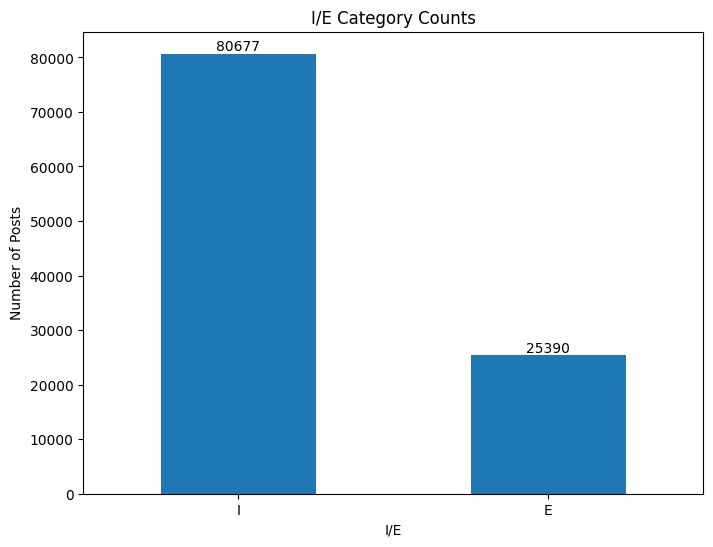

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Lenovo/Desktop/NLP-project/data/MBTI500.csv")

df = df.dropna(subset=['type'])

#  Calculate the number of classifications for I/E
i_e_count = df['type'].str[0].value_counts().reindex(['I', 'E'])

# Draw a histogram for I/E classification

fig, ax = plt.subplots(figsize=(8, 6))
i_e_count.plot(kind='bar', ax=ax)

# Add quantity labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.title('I/E Category Counts')
plt.xlabel('I/E')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()


Frequency of I: 80677
Frequency of E: 25390


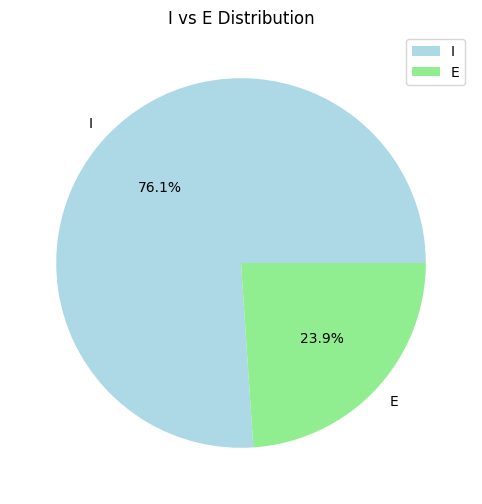

In [ ]:
df_filtered = df[df['type'].str[0].isin(['I', 'E'])]
i_e_count = df_filtered['type'].str[0].value_counts().reindex(['I', 'E'])

print(f"Frequency of I: {i_e_count.get('I', 0)}")
print(f"Frequency of E: {i_e_count.get('E', 0)}")

#Draw a frequency pie chart for I and E
fig, ax = plt.subplots(figsize=(8, 6))
i_e_count.plot(kind='pie', ax=ax, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], legend=True)
plt.title('I vs E Distribution')
plt.ylabel('')  
plt.show()


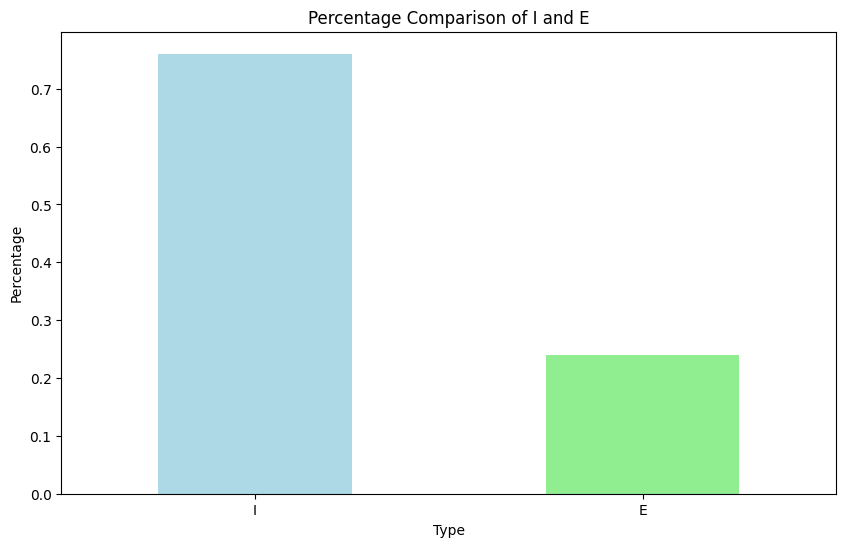

In [ ]:
# Draw a percentage stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
i_e_count_normalized = i_e_count / i_e_count.sum()  #Calculate percentage
i_e_count_normalized.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'lightgreen'])

plt.title('Percentage Comparison of I and E')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


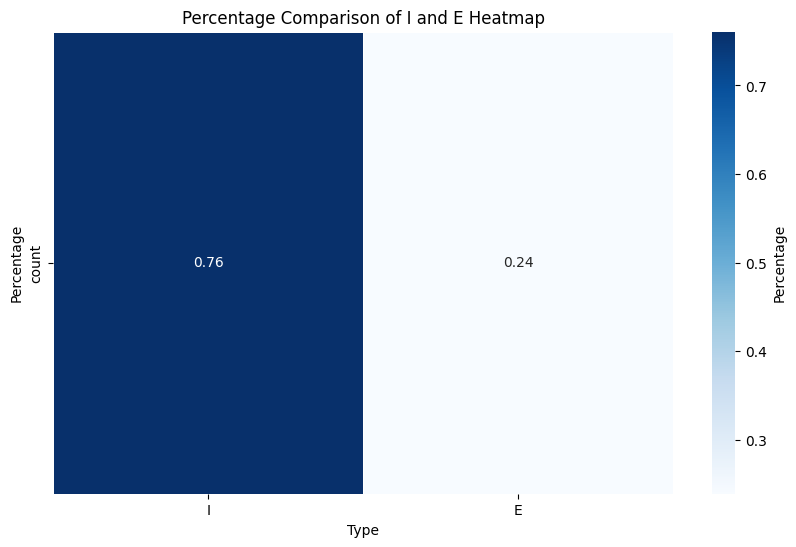

In [ ]:
i_e_count = df_filtered['type'].str[0].value_counts()

i_e_count_normalized = i_e_count / i_e_count.sum()

# Create heat map data
i_e_heatmap_data = i_e_count_normalized.to_frame().T 

# Draw a heat map
plt.figure(figsize=(10, 6))
sns.heatmap(i_e_heatmap_data, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Percentage'}, linewidths=0.5)

plt.title('Percentage Comparison of I and E Heatmap')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.show()


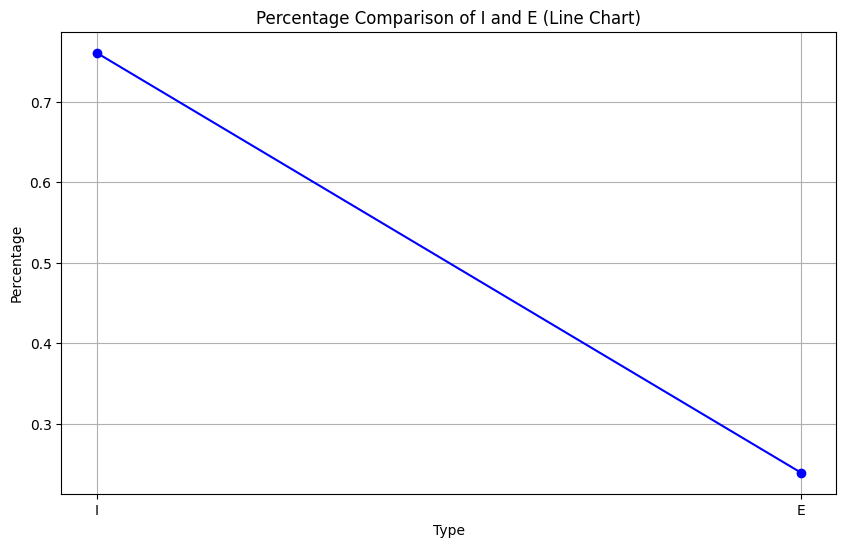

In [ ]:
# Draw a line chart
plt.figure(figsize=(10, 6))
plt.plot(i_e_count_normalized.index, i_e_count_normalized.values, marker='o', linestyle='-', color='b')

plt.title('Percentage Comparison of I and E (Line Chart)')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
